In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
# Lista com os caminhos dos arquivos CSV
arquivos_csv = ['FATOR_CAPACIDADE-2_2024_11.csv', 'FATOR_CAPACIDADE-2_2024_10.csv', 'FATOR_CAPACIDADE-2_2024_09.csv']

# Ler e concatenar todos os arquivos
df = pd.concat([pd.read_csv(arquivo, sep=';') for arquivo in arquivos_csv], ignore_index=True)

# Verificar o DataFrame final
df.head(5)

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitudesecoletora,val_longitudesecoletora,val_latitudepontoconexao,val_longitudepontoconexao,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,id_ons,ceg,din_instante,val_geracaoprogramada,val_geracaoverificada,val_capacidadeinstalada,val_fatorcapacidade
0,N,Norte,MA,MARANHAO,MIRANDA II500kVA,NaN,-2.727222,-42.596389,-3.566219,-44.535478,Conjunto de Usinas,Eólica,Conj. Paulino Neves,CJU_MAPLN,-,2024-11-01 00:00:00,358.5,357.489,426.00,0.839176
1,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,-14.030300,-42.624600,Conjunto de Usinas,Eólica,Conj. Araçás,CJU_BAARA,-,2024-11-01 00:00:00,77.0,80.495,167.70,0.479994
2,NE,Nordeste,BA,BAHIA,U.SOBRADINHO - 500 kV (A),Interior,-9.751812,-41.006198,-9.436083,-40.829167,Conjunto de Usinas,Eólica,Conj. Arizona,CJU_BAARI,-,2024-11-01 00:00:00,181.5,151.749,228.69,0.663558
3,NE,Nordeste,BA,BAHIA,MORRO CHAPEU2 - 230 kV (A),Interior,-10.970000,-41.228000,-11.714700,-41.398900,Conjunto de Usinas,Eólica,Conj. Babilônia,CJU_BABAB,-,2024-11-01 00:00:00,135.0,129.911,136.50,0.951729
4,NE,Nordeste,BA,BAHIA,OUROLANDIA II - 230 kV (A),Interior,-11.119977,-41.290773,-10.874500,-41.339900,Conjunto de Usinas,Eólica,Conj. Babilônia Sul,CJU_BABBS,-,2024-11-01 00:00:00,337.0,346.934,364.50,0.951808


In [ ]:
# Estatísticas descritivas
print(df.describe())

       val_latitudesecoletora  val_longitudesecoletora  \
count           387552.000000            387552.000000   
mean               -10.116329               -40.681855   
std                  6.768870                 4.465724   
min                -33.473520               -55.753600   
25%                -13.310839               -42.608611   
50%                 -7.963652               -40.574048   
75%                 -5.271972               -36.814212   
max                 -2.727222               -35.447243   

       val_latitudepontoconexao  val_longitudepontoconexao  \
count             384432.000000              384432.000000   
mean                 -10.051228                 -40.618810   
std                    6.680283                   4.455356   
min                  -33.473520                 -55.753600   
25%                  -12.583053                 -42.614000   
50%                   -8.033014                 -40.300463   
75%                   -5.377281            

Pré Processamento

In [ ]:
# Verificação de valores ausentes
print(df.isnull().sum())

id_subsistema                    0
nom_subsistema                   0
id_estado                        0
nom_estado                       0
nom_pontoconexao                 0
nom_localizacao              66528
val_latitudesecoletora        3984
val_longitudesecoletora       3984
val_latitudepontoconexao      7104
val_longitudepontoconexao     7104
nom_modalidadeoperacao           0
nom_tipousina                    0
nom_usina_conjunto               0
id_ons                           0
ceg                              0
din_instante                     0
val_geracaoprogramada         6072
val_geracaoverificada            0
val_capacidadeinstalada          0
val_fatorcapacidade              0
dtype: int64


In [ ]:
# Remover ou preencher valores ausentes (se necessário)
df = df.dropna()  # Remove registros com valores nulos

In [ ]:
# Remover colunas desnecessárias
df = df.drop(['ceg', 'din_instante'], axis=1)

In [ ]:
# Aplicar One-Hot Encoding
categorical_columns = ['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado',
                       'nom_pontoconexao', 'nom_localizacao', 'nom_modalidadeoperacao',
                       'nom_tipousina', 'nom_usina_conjunto', 'id_ons']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
# Selecionar colunas numéricas
numerical_columns = ['val_latitudesecoletora', 'val_longitudesecoletora',
                     'val_latitudepontoconexao', 'val_longitudepontoconexao',
                     'val_capacidadeinstalada']

scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

Rápida Análise Exploratória

In [ ]:
# Matriz de correlação com One-Hot Encoding aplicado
correlation_matrix = df_encoded.corr()

Correlações filtradas:
val_geracaoverificada      1.000000
val_geracaoprogramada      0.888498
val_capacidadeinstalada    0.636194
val_fatorcapacidade        0.618559
Name: val_geracaoverificada, dtype: float64


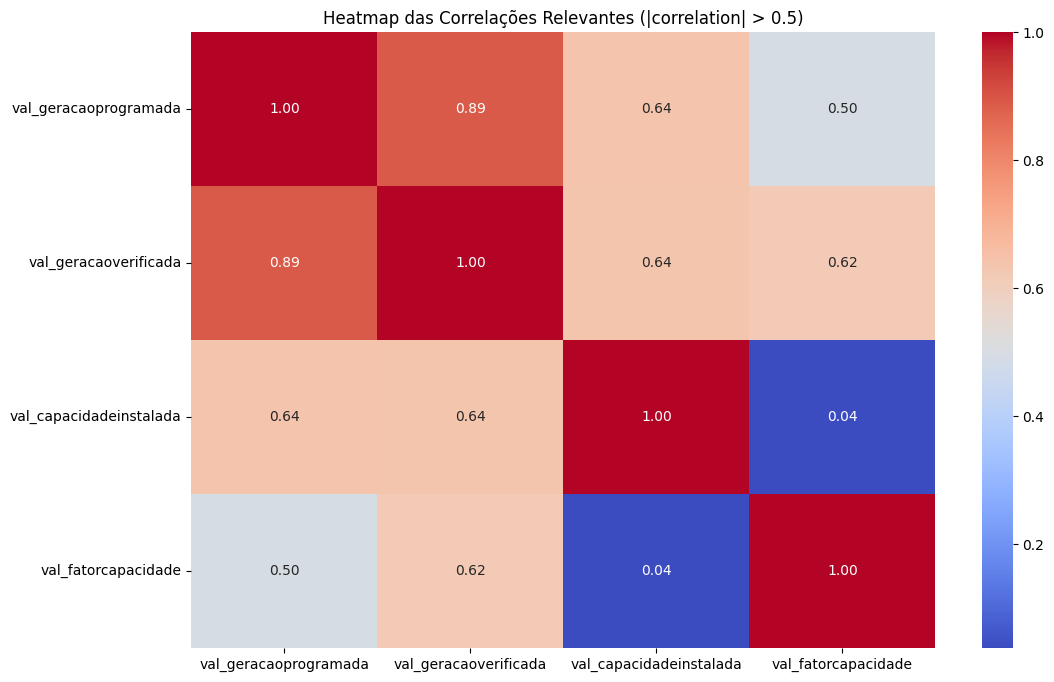

In [ ]:
# Filtrar variáveis com alta correlação com a variável alvo
target_column = 'val_geracaoverificada'
if target_column in correlation_matrix.columns:
    filtered_corr = correlation_matrix[target_column][abs(correlation_matrix[target_column]) > 0.5]
    print("Correlações filtradas:")
    print(filtered_corr.sort_values(ascending=False))

    # Pegar as colunas relevantes para o heatmap
    relevant_columns = filtered_corr.index.tolist()

    # Heatmap com as correlações filtradas
    filtered_correlation_matrix = correlation_matrix.loc[relevant_columns, relevant_columns]
    plt.figure(figsize=(12, 8))
    sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Heatmap das Correlações Relevantes (|correlation| > 0.5)')
    plt.show()
else:
    print(f"A variável '{target_column}' não está no DataFrame.")

In [ ]:
# Verificar frequência dos subsistemas
print(df['id_subsistema'].value_counts())

id_subsistema
NE    316320
SE      3552
Name: count, dtype: int64


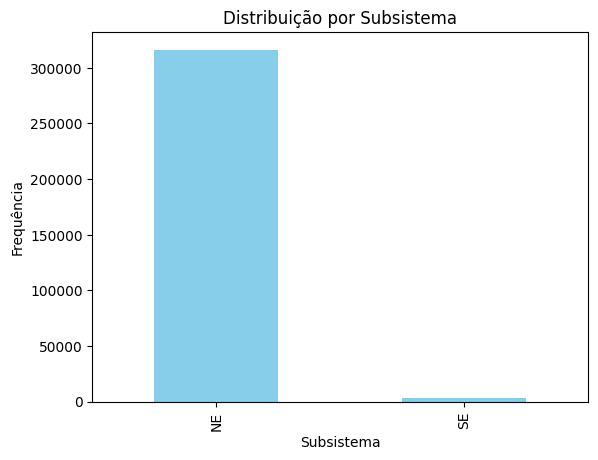

In [ ]:
# Gráfico de barras para a frequência dos subsistemas
df['id_subsistema'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição por Subsistema')
plt.xlabel('Subsistema')
plt.ylabel('Frequência')
plt.show()

Modelo de ML e Deep Learning

In [ ]:
# Dividir em X (features) e y (target)
X = df_encoded.drop('val_geracaoverificada', axis=1)
y = df_encoded['val_geracaoverificada']

In [ ]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinamento do modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model_rf.predict(X_test)

In [ ]:
# Avaliar o modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE Random Forest: {rmse}")

RMSE Random Forest: 1.2528122829774282


In [ ]:
# Modelo sequencial para rede neural
model_nn = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Saída contínua para regressão
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilação
model_nn.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Treinamento
model_nn.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 1914.7222 - val_loss: 154.7722
Epoch 2/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 150.0047 - val_loss: 36.8351
Epoch 3/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 66.2324 - val_loss: 53.2687
Epoch 4/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 52.5193 - val_loss: 41.7696
Epoch 5/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 46.1445 - val_loss: 19.3097
Epoch 6/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 48.4060 - val_loss: 19.1158
Epoch 7/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 48.7215 - val_loss: 39.7795
Epoch 8/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 32.7835 - val_loss: 5.2373
Epoch 9/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 34.0089 - val_loss: 11.9821
Epoch 10/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 34.0187 - val_loss: 7.4609
Epoch 11/50
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 27.8119 - val_loss: 6.8

In [ ]:
# Avaliação
y_pred_nn = model_nn.predict(X_test)
print(f"RMSE Neural Network: {np.sqrt(mean_squared_error(y_test, y_pred_nn))}")

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
RMSE Neural Network: 3.687127518650658


In [ ]:
# Salvar os modelos
joblib.dump(model_rf, 'modelo_rf.pkl')  # Random Forest
model_nn.save('modelo_nn.h5')  # Rede Neural

In [ ]:
# Adicionar previsões ao DataFrame
y_pred_full = model_rf.predict(X)
df_encoded['val_geracaoverificada_prevista'] = y_pred_full

In [ ]:
# Conferir resultados
print(df_encoded[['val_geracaoverificada', 'val_geracaoverificada_prevista']].head())

   val_geracaoverificada  val_geracaoverificada_prevista
1                 80.495                        80.76214
2                151.749                       152.10284
3                129.911                       129.97682
4                346.934                       346.92103
5                152.560                       152.49725


In [ ]:
df_encoded.head(5)


,val_latitudesecoletora,val_longitudesecoletora,val_latitudepontoconexao,val_longitudepontoconexao,val_geracaoprogramada,val_geracaoverificada,val_capacidadeinstalada,val_fatorcapacidade,id_subsistema_SE,nom_subsistema_Sudeste/Centro-Oeste,...,id_ons_CJU_RNUMR,id_ons_CJU_RNUVT,id_ons_PISDP1,id_ons_RNFVAE,id_ons_RNUAD,id_ons_RNUAU,id_ons_RNUERT,id_ons_RNUERU,id_ons_RNUES3,val_geracaoverificada_prevista
1,-1.719128,-1.207602,-1.704312,-1.213711,77.0,80.495,-0.209677,0.479994,False,False,...,False,False,False,False,False,False,False,False,False,80.76214
2,-0.502068,-0.628851,-0.398132,-0.562542,181.5,151.749,0.157479,0.663558,False,False,...,False,False,False,False,False,False,False,False,False,152.10284
3,-0.842820,-0.708922,-1.045965,-0.769173,135.0,129.911,-0.397500,0.951729,False,False,...,False,False,False,False,False,False,False,False,False,129.97682
4,-0.884772,-0.731584,-0.807088,-0.747775,337.0,346.934,0.975048,0.951808,False,False,...,False,False,False,False,False,False,False,False,False,346.92103
5,-1.217481,-1.111386,-1.215046,-1.111525,137.5,152.560,-0.165792,0.871821,False,False,...,False,False,False,False,False,False,False,False,False,152.49725


In [ ]:
df_encoded.shape

(319872, 484)

In [ ]:
df.shape

(319872, 18)

In [ ]:
# Adicionar a coluna 'val_geracaoverificada_prevista' do df_encoded ao df
df['val_geracaoverificada_prevista'] = df_encoded['val_geracaoverificada_prevista']

df_final = df

# Verificar se a coluna foi adicionada corretamente
df_final.head(5)


,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitudesecoletora,val_longitudesecoletora,val_latitudepontoconexao,val_longitudepontoconexao,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,id_ons,val_geracaoprogramada,val_geracaoverificada,val_capacidadeinstalada,val_fatorcapacidade,val_geracaoverificada_prevista
1,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,-14.030300,-42.624600,Conjunto de Usinas,Eólica,Conj. Araçás,CJU_BAARA,77.0,80.495,167.70,0.479994,80.76214
2,NE,Nordeste,BA,BAHIA,U.SOBRADINHO - 500 kV (A),Interior,-9.751812,-41.006198,-9.436083,-40.829167,Conjunto de Usinas,Eólica,Conj. Arizona,CJU_BAARI,181.5,151.749,228.69,0.663558,152.10284
3,NE,Nordeste,BA,BAHIA,MORRO CHAPEU2 - 230 kV (A),Interior,-10.970000,-41.228000,-11.714700,-41.398900,Conjunto de Usinas,Eólica,Conj. Babilônia,CJU_BABAB,135.0,129.911,136.50,0.951729,129.97682
4,NE,Nordeste,BA,BAHIA,OUROLANDIA II - 230 kV (A),Interior,-11.119977,-41.290773,-10.874500,-41.339900,Conjunto de Usinas,Eólica,Conj. Babilônia Sul,CJU_BABBS,337.0,346.934,364.50,0.951808,346.92103
5,NE,Nordeste,BA,BAHIA,BROT.MACAUBAS - 230 kV (A),Interior,-12.309409,-42.342846,-12.309409,-42.342846,Conjunto de Usinas,Eólica,Conj. Brotas de Macaúbas,CJU_BABMC,137.5,152.560,174.99,0.871821,152.49725


In [ ]:
# Remover duplicatas mantendo a linha com o maior valor na coluna 'capacidade'
df_final = df_final.loc[df.groupby('nom_usina_conjunto')['val_geracaoverificada_prevista'].idxmax()]
df_final.head(5)

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitudesecoletora,val_longitudesecoletora,val_latitudepontoconexao,val_longitudepontoconexao,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,id_ons,val_geracaoprogramada,val_geracaoverificada,val_capacidadeinstalada,val_fatorcapacidade,val_geracaoverificada_prevista
65320,NE,Nordeste,RN,RIO GRANDE DO NORTE,ACU II - 230 kV (A),Litoral,-5.115283,-36.384401,-5.593044,-36.908622,Tipo I,Eólica,Alegria I,RNUAU,28.5,45.564,51.00,0.893412,45.37761
197096,NE,Nordeste,RN,RIO GRANDE DO NORTE,ACU II - 230 kV (A),Litoral,-5.097279,-36.402501,-5.593044,-36.908622,Tipo I,Eólica,Alegria II,RNUAD,54.0,82.290,100.65,0.817586,82.12733
154933,NE,Nordeste,RN,RIO GRANDE DO NORTE,ACU II - 138 kV (A),Litoral,-5.546004,-37.026390,-5.593044,-36.908622,Tipo II-B,Solar,Assú V,RNFVAE,25.5,32.287,34.00,0.949618,32.08917
219394,NE,Nordeste,CE,CEARA,ACARAU II - 230 kV (A),Litoral,-2.841442,-40.066143,-2.927658,-40.114352,Tipo II-B,Eólica,Cataventos Acaraú I,CEECVA,11.5,15.608,28.00,0.557429,15.47824
93490,NE,Nordeste,BA,BAHIA,PINDAI II - 230 kV (A),Interior,-14.353933,-42.575842,-14.415433,-42.607767,Conjunto de Usinas,Eólica,Conj. Abil I,CJU_BAABL,60.0,63.852,180.00,0.354733,63.93095


In [ ]:
df_final.shape

(189, 19)

In [ ]:
df_final.to_csv('df_final.csv', index=False)